# Baris Engin 24213918

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('tracks.csv')

Check if there are any missing values in the dataset, as well as the data type for each column.

In [3]:
print("Dataset information:")
data.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1500 non-null   int64  
 1   duration_ms       1500 non-null   int64  
 2   explicit          1500 non-null   bool   
 3   danceability      1500 non-null   float64
 4   energy            1500 non-null   float64
 5   key               1500 non-null   int64  
 6   loudness          1500 non-null   float64
 7   mode              1500 non-null   int64  
 8   speechiness       1500 non-null   float64
 9   acousticness      1500 non-null   float64
 10  instrumentalness  1500 non-null   float64
 11  liveness          1500 non-null   float64
 12  valence           1500 non-null   float64
 13  tempo             1500 non-null   float64
 14  time_signature    1500 non-null   int64  
 15  track_genre       1500 non-null   object 
dtypes: bool(1), float64(9

Calculate the median of popularity

In [4]:
popularity_median = data['popularity'].median()
print(f"Median of popularity: {popularity_median}")

Median of popularity: 25.0


Create a popularity_binary column where rows with popularity above median are 1 and the rest is 0

In [5]:
data['popularity_binary'] = (data['popularity'] > popularity_median).astype(int)

Prepare the features and target

In [6]:
X = data.drop(['popularity', 'popularity_binary'], axis=1)
y = data['popularity_binary']

Create training set and testing set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Separate categorical and numerical columns

In [8]:
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [9]:
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['explicit', 'track_genre']
Numerical columns: ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


Define numerical and categorical transformers, we use StandardScaler for numerical columns and OneHotEncoder for categorial columns. No missing values so no need to use imputer.

In [10]:
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [11]:
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

Combine preprocessing steps

In [12]:
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols), ('cat', categorical_transformer, categorical_cols)])

Define a function to evaluate various models

In [22]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {roc_auc:.4f}")
    
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': roc_auc
    }

Use logistic regressor, random forest, gradient booster and SVM as classification algorithms

In [23]:
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif, k=10)),  # Select top 10 features
    ('classifier', LogisticRegression(random_state=42))
])

In [24]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [25]:
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [26]:
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),  # Keep 95% of variance
    ('classifier', SVC(probability=True, random_state=42))
])

In [27]:
models = {
    'Logistic Regression': logreg_pipeline,
    'Random Forest': rf_pipeline,
    'Gradient Boosting': gb_pipeline,
    'SVM': svm_pipeline
}

Train and evaluate the models


--------------------------------------------------
Training and evaluating Logistic Regression...
Accuracy: 0.6867
Precision: 0.7526
Recall: 0.5105
F1 Score: 0.6083
AUC Score: 0.7222
Confusion Matrix:


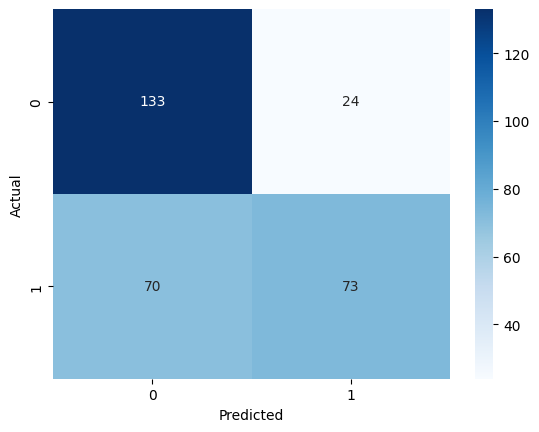

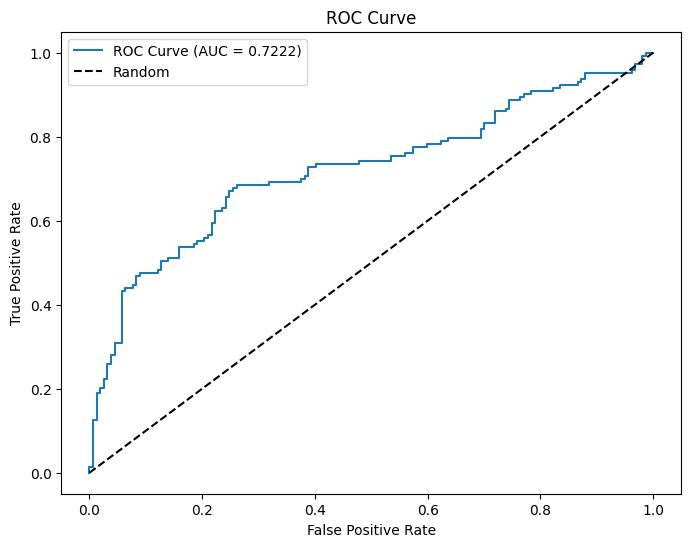


--------------------------------------------------
Training and evaluating Random Forest...
Accuracy: 0.7300
Precision: 0.7214
Recall: 0.7063
F1 Score: 0.7138
AUC Score: 0.8172
Confusion Matrix:


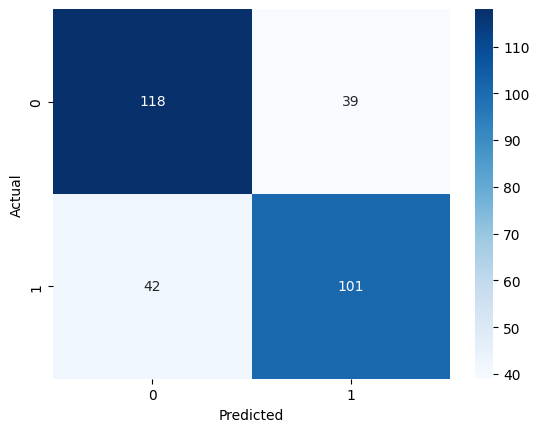

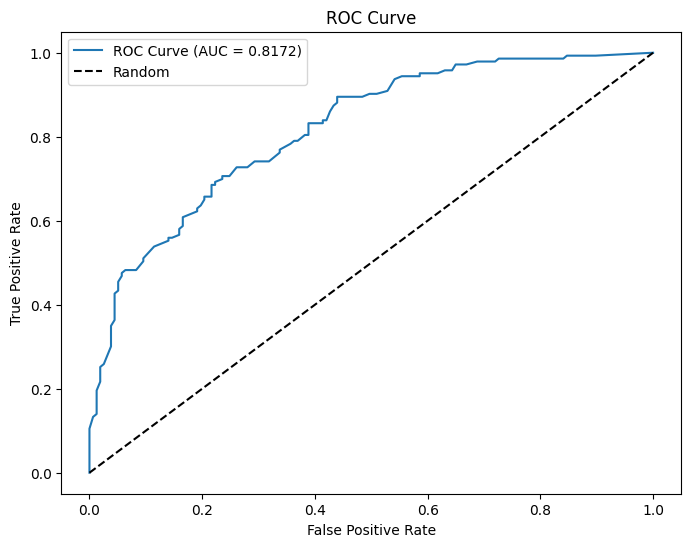


--------------------------------------------------
Training and evaluating Gradient Boosting...
Accuracy: 0.7100
Precision: 0.7188
Recall: 0.6434
F1 Score: 0.6790
AUC Score: 0.7576
Confusion Matrix:


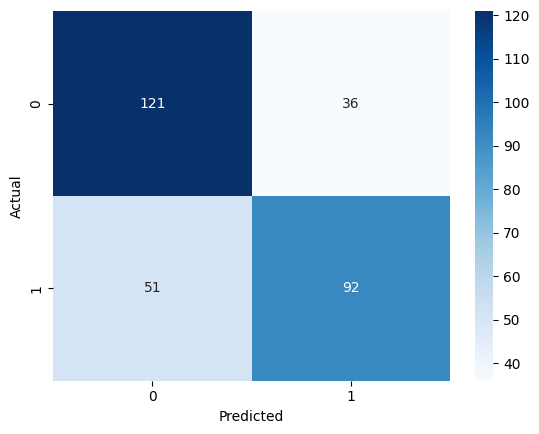

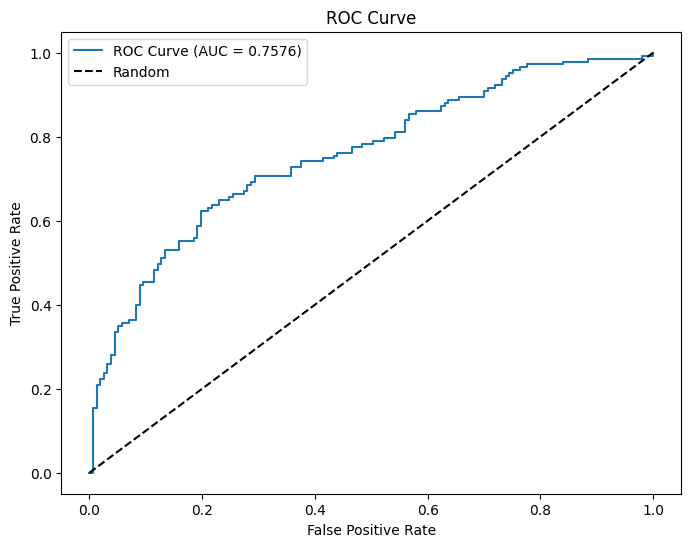


--------------------------------------------------
Training and evaluating SVM...
Accuracy: 0.7367
Precision: 0.7667
Recall: 0.6434
F1 Score: 0.6996
AUC Score: 0.7802
Confusion Matrix:


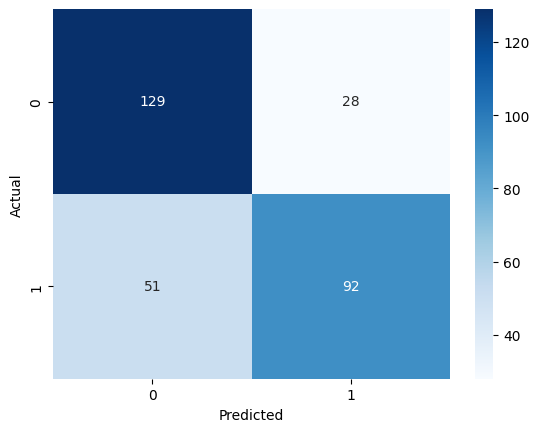

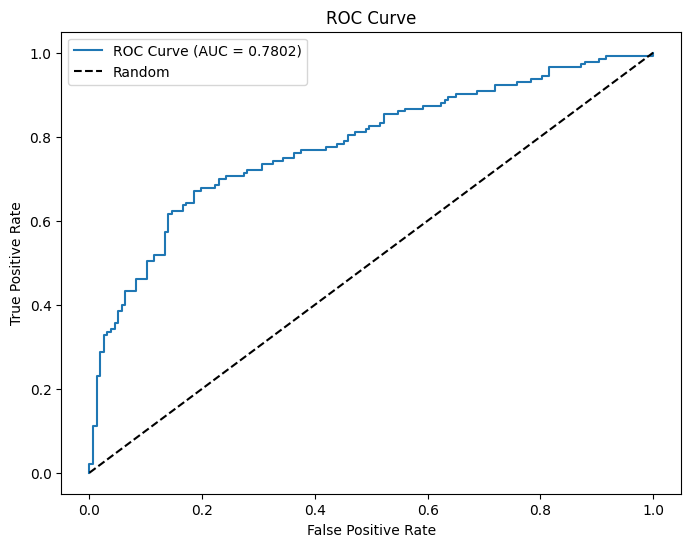

In [28]:
results = {}
for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"Training and evaluating {name}...")
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_test, y_test)

Compare models by their resulting accuracy, precision, recall, f1-score and AUC score

<Figure size 640x480 with 0 Axes>

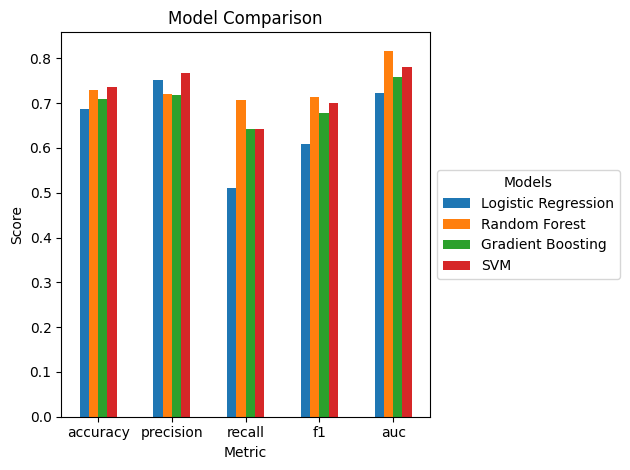

In [52]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
comparison_df = pd.DataFrame({model_name: [results[model_name][metric] for metric in metrics] 
                             for model_name in models.keys()}, index=metrics)

plt.figure()
comparison_df.plot(kind='bar')
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=0)
plt.legend(title='Models', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()